<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/CS575_MidSem_solution/A2_Dataset4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution for Dataset4

In [69]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [70]:
#importing the dataset

D4 = pd.read_csv("Dataset4_yahoo304.96.8.14.csv", names = ["actual"])
D4.head()

,actual
0,35.91
1,35.66
2,35.79
3,35.70
4,36.53


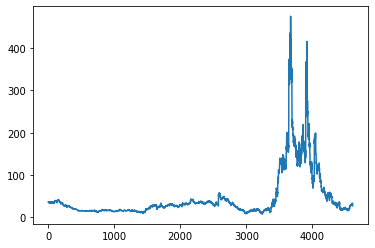

In [71]:
plt.plot(D4['actual'])

#KPSS Test

In [72]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D4[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('actual')

Results of KPSS Test for  actual
Test Statistic            3.701679
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D4 , the value of the test statistic is greater than the critical value at all confidence intervals in the KPSS test, hence the series is non stationary.

#ADF Test

In [73]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D4[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('actual')

Results of Dickey-Fuller Test for  actual 

Test Statistic                   -3.286733
p-value                           0.015482
#Lags Used                       30.000000
Number of Observations Used    4582.000000
Critical Value (1%)              -3.431778
Critical Value (5%)              -2.862171
Critical Value (10%)             -2.567106
dtype: float64


>For the given dataset D4 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, hence  the series is non stationary.

Note:  The signed values should be compared and not the absolute values.

**Since, both tests conclude that the series is non stationary, therefore, the dataset is concluded as Non Stationary.**

# making non stationary series to stationary

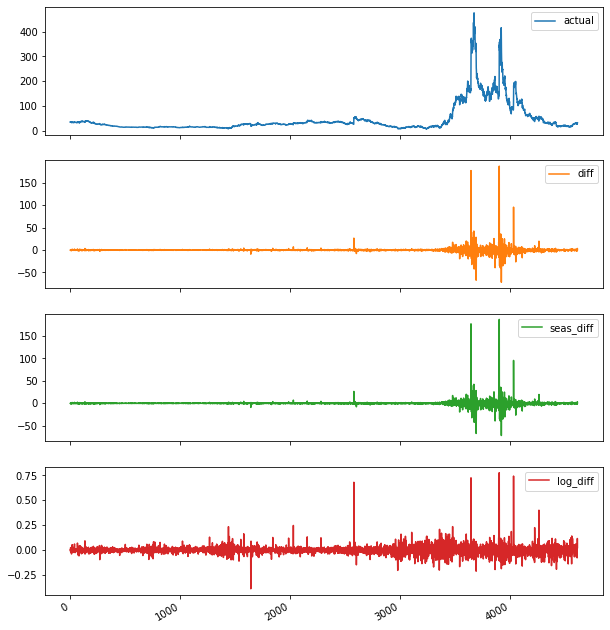

In [74]:
# Differencing
D4['diff'] = D4['actual'].diff(periods=1)

# Seasonal Differencing
D4['seas_diff'] = D4['actual'].diff(periods=1)

# Transformation (here we use log transformation)
D4_log = np.log(D4['actual'])
D4['log_diff'] = D4_log.diff(periods=1)

D4.plot(subplots=True, figsize=(10,12))
plt.show()



> From the above plot we can visiualise that coloumn log_diff is stationary series




In [75]:
data = D4['actual']

#Single Exponential Smoothing

In [76]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

In [77]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [78]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [79]:
#Calculating mean absolute error function for single exponential smoothing 

def MAE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE


In [80]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=2), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=4), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=12), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=24), "\n")

MSE for alpha =.4 is   55.57114482453616 

MSE for alpha =.35 is  74.16358827985897 

MSE for alpha =.65 is  56.14085053481442 

MSE for alpha =.85 is  20.267643060308714 

MSE for alpha =.65 is  51.619888550495176 

MSE for alpha =.85 is  24.644737929888255 



In [81]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_SES(data, .4 ,interval=1), "\n")
print("MAE  is " ,MAE_SES(data, .4  ,interval=2), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=4), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=8), "\n")
print("MAE  is " ,MAE_SES(data,.4  ,interval=12), "\n")
print("MAE  is " ,MAE_SES(data,.4 ,interval=24), "\n")

MAE  is  2.1467574530885147 

MAE  is  2.466090859681382 

MAE  is  3.279742703139816 

MAE  is  4.443611381658667 

MAE  is  5.013224652770376 

MAE  is  7.2539365479939875 



#Double Exponential Smoothing

In [82]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [83]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [84]:
#Calculating mean absolute error function for double exponential smoothing 

def MAE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [85]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=2), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=4), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=8), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=12), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=24), "\n")


MSE for alpha =.4,  beta = .2  is  59.06449089875912 

MSE for alpha =.35, beta = .5  is  121.82207961336375 

MSE for alpha =.85, beta = .6  is  175.40776247112936 

MSE for alpha =.45, beta = .6  is  475.58308546904107 

MSE for alpha =.7,  beta = .55 is  462.3059220949977 

MSE for alpha =.2,  beta = .6  is  1614.8211558948444 



In [86]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=1), "\n")
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=2), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=4), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=8), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=12), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=24), "\n")

MAE  is  2.2299543237312234 

MAE  is  3.1657649152143206 

MAE  is  4.731809167431678 

MAE  is  7.354606140833322 

MAE  is  8.657222086982955 

MAE  is  12.436793004608832 



#Triple Exponential Smoothing

In [87]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [88]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [89]:
#Calculating mean absolute error function for Triple exponential smoothing 

def MAE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [90]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,1, .35, .5, .3, interval=2), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,1, .45, .6, .4 ,interval=4), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=12), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=24), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  4.63569243099167 

MSE for alpha =.35, beta = .5,  gamma = .3  is  22.957856213022183 

MSE for alpha =.45, beta = .6,  gamma = .4  is  30.684070342444787 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  31.09447259900941 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  51.294025914851744 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  103.1272736445109 



In [91]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=2), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=4), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=12), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=24), "\n")

MAE  is  0.6737595094634797 

MAE  is  0.9795282663728786 

MAE  is  1.391658182635285 

MAE  is  2.02898341590649 

MAE  is  2.2845636652122816 

MAE  is  3.458384160231372 



# AR

In [92]:
#fit model
model=ARIMA(D4['log_diff'].dropna(), order=(1,0,0))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D4['forecast1'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:               log_diff   No. Observations:                 4612
Model:                     ARMA(1, 0)   Log Likelihood                7878.786
Method:                       css-mle   S.D. of innovations              0.044
Date:                Mon, 01 Mar 2021   AIC                         -15751.572
Time:                        05:53:57   BIC                         -15732.263
Sample:                             0   HQIC                        -15744.776
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.83e-05      0.001     -0.028      0.978      -0.001       0.001
ar.L1.log_diff     0.0085      0.015      0.579      0.563      -0.020       0.037
                                    

In [93]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D4['log_diff'],D4['forecast1'])).mean() 
print("MSE for AR is", MSE)

MSE for AR is 0.0019217420489272981


In [94]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D4['log_diff'],D4['forecast1'])).mean() 
print("MAE for AR is", MAE)


MAE for AR is 0.025875214608960327


# MA

In [95]:
#fit model
model=ARIMA(D4['log_diff'].dropna(), order=(0,0,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D4['forecast2'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:               log_diff   No. Observations:                 4612
Model:                     ARMA(0, 1)   Log Likelihood                7878.798
Method:                       css-mle   S.D. of innovations              0.044
Date:                Mon, 01 Mar 2021   AIC                         -15751.596
Time:                        05:53:57   BIC                         -15732.286
Sample:                             0   HQIC                        -15744.800
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.83e-05      0.001     -0.028      0.978      -0.001       0.001
ma.L1.log_diff     0.0091      0.015      0.599      0.549      -0.021       0.039
                                    

In [96]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D4['log_diff'],D4['forecast2'])).mean() 
print("MSE for MR is", MSE)

MSE for MR is 0.0019217321788021836


In [97]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D4['log_diff'],D4['forecast2'])).mean() 
print("MAE for MR is", MAE)


MAE for MR is 0.02587521864494126


# ARIMA

In [98]:
#fit model
model=ARIMA(D4['actual'].dropna(), order=(1,1,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D4['forecast3'] = model_fit.predict()

                             ARIMA Model Results                              
Dep. Variable:               D.actual   No. Observations:                 4612
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14674.697
Method:                       css-mle   S.D. of innovations              5.829
Date:                Mon, 01 Mar 2021   AIC                          29357.393
Time:                        05:53:58   BIC                          29383.139
Sample:                             1   HQIC                         29366.454
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0006      0.091     -0.007      0.995      -0.179       0.178
ar.L1.D.actual     0.1223      0.145      0.846      0.398      -0.161       0.406
ma.L1.D.actual    -0.0683      0.145

In [99]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D4['log_diff'],D4['forecast3'])).mean() 
print("MSE for ARIMA is", MSE)

MSE for ARIMA is 0.10180030107463137


In [100]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D4['log_diff'],D4['forecast3'])).mean() 
print("MAE for ARIMA is", MAE)


MAE for ARIMA is 0.09715640070197691


# Optimal model check

In [101]:
!pip3 install pmdarima
import pmdarima as pm

In [102]:
model = pm.auto_arima(D4.iloc[:,0], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29358.877, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=52832.194, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=46916.004, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=29360.811, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=29357.882, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=42222.823, Time=2.74 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29345.809, Time=1.96 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=29290.882, Time=4.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=29348.048, Time=1.93 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=29296.227, Time=4.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=29340.140, Time=1.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=29295.962, Time=8.71 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 27.419 seconds
              

so best optimal model is ARIMA

# table

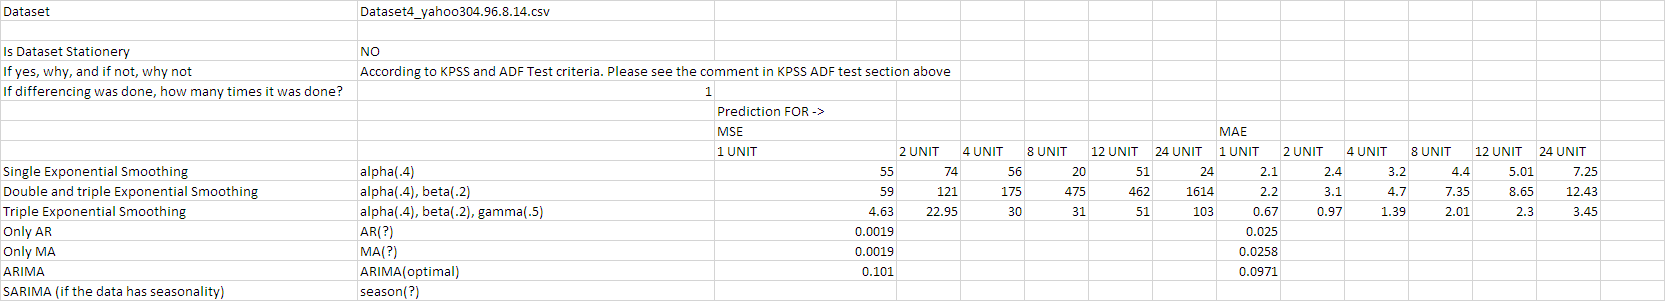